<h4 style="color: #ffcc00">Adatkutatás Pythonnal I.</h4>

In [1]:
import pandas as pd

In [2]:
# Betöltjük a három táblát
movies = pd.read_csv("dataset/movies.csv")
reviews = pd.read_csv("dataset/reviews.csv")
users = pd.read_csv("dataset/users.csv")

In [3]:
# Összefűzzük őket a "movie_id" majd a "user_id" kulcsokat használva
df = pd.merge(movies, reviews, on = "movie_id", how = 'inner')
df = pd.merge(df, users, on = "user_id", how = 'inner')

# Egyesítjük a vezeték- és keresztneveket
df["full_name"] = df["first_name"] + " " + df["last_name"]

In [4]:
df.head()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating_x,language,country_of_origin,...,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at,full_name
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,North Carolina,Jeffersonchester,Basic,2024-04-04,False,16.51,Gaming Console,NaN,2024-05-26 14:49:07.359996,David Miller
1,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,Ontario,West Lisaberg,Standard,2023-07-07,True,26.49,Gaming Console,3.0,2023-08-28 03:45:36.319580,Brenda Espinoza
2,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,Maryland,Barberfurt,Premium,2024-07-30,False,23.37,Laptop,2.0,2023-05-22 18:36:08.422186,Lacey Castro
3,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,Wisconsin,Natalieport,Standard,2025-04-16,False,13.63,Tablet,6.0,2024-04-15 21:03:21.927440,Catherine Russell
4,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,Alberta,Lake Jennifer,Premium,2024-06-03,True,12.08,Tablet,6.0,2023-03-24 09:28:21.819991,Briana Marshall


In [5]:
# Csak a szükséges oszlopokat tartjuk meg
merged = df[['title', 
    'genre_primary',
    'release_year',
    'total_votes',
    'review_date',
    'added_to_platform',
    'full_name',
    'gender',
    'age',
    'subscription_plan',
    'country',
    'state_province',
    'city',
    'device_type',
    'sentiment']]

In [6]:
# Gyors adattisztítás
data = merged.drop_duplicates().dropna()

In [7]:
data.head()

,title,genre_primary,release_year,total_votes,review_date,added_to_platform,full_name,gender,age,subscription_plan,country,state_province,city,device_type,sentiment
1,Dragon Legend,History,2014,6.0,2024-06-20,2023-08-07,Brenda Espinoza,Male,28.0,Standard,Canada,Ontario,West Lisaberg,Smart TV,neutral
2,Dragon Legend,History,2014,4.0,2024-10-23,2023-08-07,Lacey Castro,Male,52.0,Premium,USA,Maryland,Barberfurt,Tablet,negative
3,Dragon Legend,History,2014,3.0,2024-08-25,2023-08-07,Catherine Russell,Female,36.0,Standard,USA,Wisconsin,Natalieport,Mobile,positive
5,Dragon Legend,History,2014,4.0,2025-09-16,2023-08-07,Julia Martin,Male,20.0,Premium,Canada,Manitoba,South Andrewchester,Laptop,neutral
9,Dragon Legend,History,2014,4.0,2024-10-29,2023-08-07,Allen Smith,Female,22.0,Premium,USA,Maryland,North Kathryn,Tablet,positive


<h4 style="color: #ffcc00">Adatkutatás Pythonnal II.</h4>

In [8]:
# Oszlopok átnevezése
data.columns = ['cim', 
    'elsodleges_mufaj', 
    'megjelenes_eve', 
    'osszes_ertekeles', 
    'ertekeles_datuma', 
    'platformhoz_adva', 
    'teljes_nev', 
    'nem', 
    'kor', 
    'elofizetes', 
    'orszag', 
    'tartomany',
    'varos',  
    'eszkoz_tipus', 
    'erzes']

In [9]:
# Megnézzük az egyedi értékeket
def unique_col_values(data):
    for column in data:
        print(data[column].name, '|' , len(data[column].unique()), '|', data[column].dtype)

unique_col_values(data)

cim | 673 | object
elsodleges_mufaj | 20 | object
megjelenes_eve | 48 | int64
osszes_ertekeles | 17 | float64
ertekeles_datuma | 731 | object
platformhoz_adva | 773 | object
teljes_nev | 5655 | object
nem | 4 | object
kor | 91 | float64
elofizetes | 4 | object
orszag | 2 | object
tartomany | 30 | object
varos | 5017 | object
eszkoz_tipus | 4 | object
erzes | 3 | object


In [10]:
# Megnézzük, hogy melyik a legkissebb és legnagyobb érték az oszlopban
min = data['osszes_ertekeles'].min()
max = data['osszes_ertekeles'].max()

print('Min: ', min)
print('Max: ', max)

Min:  0.0
Max:  16.0


In [11]:
# Létrehozunk egy új oszlopot és négy kategóriára bontjuk az értékeléseket
data.loc[(data['osszes_ertekeles'] >= 0.0) & (data['osszes_ertekeles'] <= 4.0), 'ertekeles_kategoria'] = 'Gyenge'
data.loc[(data['osszes_ertekeles'] >= 4.0) & (data['osszes_ertekeles'] <= 8.0), 'ertekeles_kategoria'] = 'Nézhető'
data.loc[(data['osszes_ertekeles'] >= 8.0) & (data['osszes_ertekeles'] <= 12.0), 'ertekeles_kategoria'] = 'Jó'
data.loc[(data['osszes_ertekeles'] >= 12.0) & (data['osszes_ertekeles'] <= 16.0), 'ertekeles_kategoria'] = 'Szuper'

In [12]:
data[['cim', 'osszes_ertekeles', 'ertekeles_kategoria']]

,cim,osszes_ertekeles,ertekeles_kategoria
1,Dragon Legend,6.0,Nézhető
2,Dragon Legend,4.0,Nézhető
3,Dragon Legend,3.0,Gyenge
5,Dragon Legend,4.0,Nézhető
9,Dragon Legend,4.0,Nézhető
...,...,...,...
15873,Last Night,5.0,Nézhető
15875,Last Night,5.0,Nézhető
15876,Last Night,4.0,Nézhető
15878,Last Night,3.0,Gyenge


In [13]:
# Kvantilis alapú kategorizálás
category = ['Gyenge', 'Nézhető', 'Jó', 'Szuper']
data['ertekeles_kategoria_kvantilis'] = pd.qcut(data['osszes_ertekeles'], q = 4, labels = category)

In [14]:
data[['cim', 'osszes_ertekeles', 'ertekeles_kategoria_kvantilis']]

,cim,osszes_ertekeles,ertekeles_kategoria_kvantilis
1,Dragon Legend,6.0,Jó
2,Dragon Legend,4.0,Gyenge
3,Dragon Legend,3.0,Gyenge
5,Dragon Legend,4.0,Gyenge
9,Dragon Legend,4.0,Gyenge
...,...,...,...
15873,Last Night,5.0,Nézhető
15875,Last Night,5.0,Nézhető
15876,Last Night,4.0,Gyenge
15878,Last Night,3.0,Gyenge


In [15]:
# Klaszterezés
# 
# Kiválasztjuk a klaszterezéshez használni kívánt oszlopokat
cluster_columns = ['osszes_ertekeles']

In [16]:
# Minden értéket elosztunk az adott jellemző maximális abszolút értékével
from sklearn import preprocessing

scaler = preprocessing.MaxAbsScaler()
data_clusters = scaler.fit_transform(data[cluster_columns])
data_clusters = pd.DataFrame(data_clusters, columns = cluster_columns)

In [17]:
# Adott adatkockát k-középértékű klaszterekbe csoportosítunk
from sklearn.cluster import KMeans

def kmeans_cluster(df, n_clusters = 2):
    model = KMeans(n_clusters = n_clusters, random_state = 1)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

In [18]:
# Megszámoljuk az egyes klaszterekbe tartozó értékelések számát, 
# és kiszámítjuk az egyes jellemzők klaszterátlagait
def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index = False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on = 'Cluster')
    return cluster_summary

In [19]:
# Összefoglaló
cluster_results = kmeans_cluster(data_clusters, 8)
cluster_summary = summarize_clustering(cluster_results)
cluster_summary

,Cluster,Count,osszes_ertekeles
0,0,1174,0.521987
1,1,1992,0.250000
2,2,1838,0.375000
3,3,1244,0.187500
4,4,2223,0.312500
5,5,364,0.667754
6,6,1283,0.437500
7,7,580,0.115948


<Axes: >

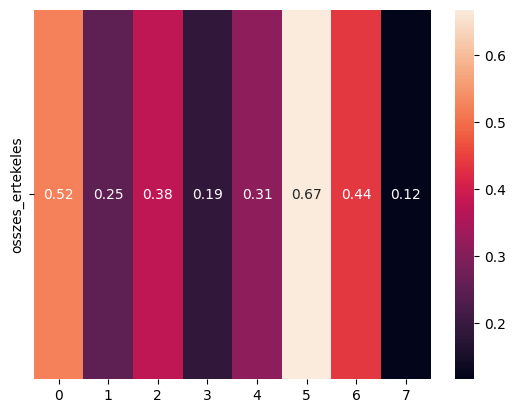

In [20]:
# Összefoglaló hőtérképen
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot = True)

<Axes: >

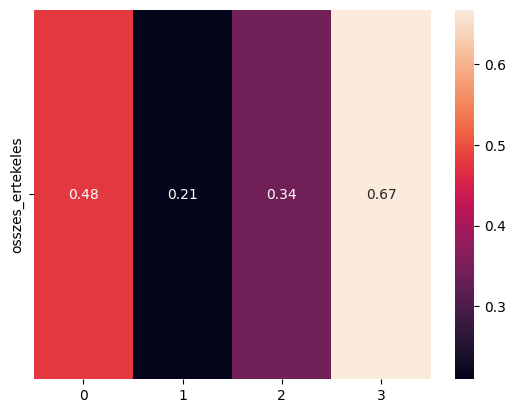

In [21]:
# Csökkentsük a klaszterek számát
cluster_results = kmeans_cluster(data_clusters, 4)
cluster_summary = summarize_clustering(cluster_results)

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot = True)

In [22]:
# Címkéket rendelünk a klaszterekhez
cluster_results['ertekeles_kategoria_cluster'] = ''
cluster_results.loc[cluster_results['Cluster'] == 0, 'ertekeles_kategoria_cluster'] = 'Jó'
cluster_results.loc[cluster_results['Cluster'] == 1, 'ertekeles_kategoria_cluster'] = 'Gyenge'
cluster_results.loc[cluster_results['Cluster'] == 2, 'ertekeles_kategoria_cluster'] = 'Nézhető'
cluster_results.loc[cluster_results['Cluster'] == 3, 'ertekeles_kategoria_cluster'] = 'Szuper'
data = data.reset_index(drop = True)
data['ertekeles_kategoria_cluster'] = cluster_results['ertekeles_kategoria_cluster']

In [23]:
data[['cim', 'osszes_ertekeles', 'ertekeles_kategoria_cluster']]

,cim,osszes_ertekeles,ertekeles_kategoria_cluster
0,Dragon Legend,6.0,Nézhető
1,Dragon Legend,4.0,Gyenge
2,Dragon Legend,3.0,Gyenge
3,Dragon Legend,4.0,Gyenge
4,Dragon Legend,4.0,Gyenge
...,...,...,...
10693,Last Night,5.0,Nézhető
10694,Last Night,5.0,Nézhető
10695,Last Night,4.0,Gyenge
10696,Last Night,3.0,Gyenge


In [24]:
data.head()

,cim,elsodleges_mufaj,megjelenes_eve,osszes_ertekeles,ertekeles_datuma,platformhoz_adva,teljes_nev,nem,kor,elofizetes,orszag,tartomany,varos,eszkoz_tipus,erzes,ertekeles_kategoria,ertekeles_kategoria_kvantilis,ertekeles_kategoria_cluster
0,Dragon Legend,History,2014,6.0,2024-06-20,2023-08-07,Brenda Espinoza,Male,28.0,Standard,Canada,Ontario,West Lisaberg,Smart TV,neutral,Nézhető,Jó,Nézhető
1,Dragon Legend,History,2014,4.0,2024-10-23,2023-08-07,Lacey Castro,Male,52.0,Premium,USA,Maryland,Barberfurt,Tablet,negative,Nézhető,Gyenge,Gyenge
2,Dragon Legend,History,2014,3.0,2024-08-25,2023-08-07,Catherine Russell,Female,36.0,Standard,USA,Wisconsin,Natalieport,Mobile,positive,Gyenge,Gyenge,Gyenge
3,Dragon Legend,History,2014,4.0,2025-09-16,2023-08-07,Julia Martin,Male,20.0,Premium,Canada,Manitoba,South Andrewchester,Laptop,neutral,Nézhető,Gyenge,Gyenge
4,Dragon Legend,History,2014,4.0,2024-10-29,2023-08-07,Allen Smith,Female,22.0,Premium,USA,Maryland,North Kathryn,Tablet,positive,Nézhető,Gyenge,Gyenge


<h4 style="color: #ffcc00">Adatkutatás Pythonnal III.</h4>

In [25]:
# Függvény az adatkészlet szűrésére és aggregálására
def agg_count(df, group_field):
    grouped = (
        df.groupby(group_field, dropna=False, observed=True)
        .size()
        .reset_index(name='count')
        .sort_values('count', ascending=False)
    )
    return grouped

In [26]:
# A History műfajon belül mely címek fordulnak elő a leggyakrabban?
genre_history = data[data['elsodleges_mufaj'] == 'History']
category_counts = agg_count(genre_history, 'cim')

In [27]:
category_counts.head(10)

,cim,count
2,A Quest,29
15,Dragon King,19
11,City Ice,18
25,King Dragon,18
4,An Ice,17
22,House Empire,15
0,A Adventure,14
27,Kingdom City,14
20,Fire Queen,14
41,Princess House,14


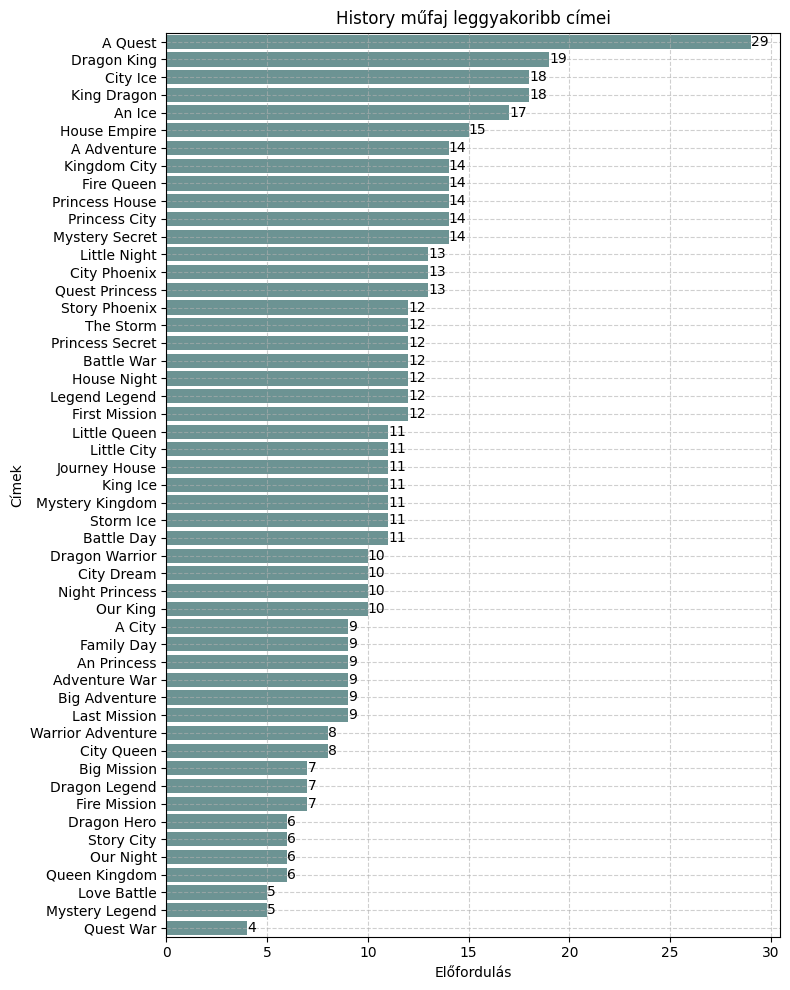

In [28]:
# Nézzük ezt meg vizuálisan is
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
ax = (
    sns.barplot(
        data=category_counts,
        x='count',
        y='cim',
        color='#669999'
    )
)
ax.set(xlabel='Előfordulás', ylabel='Címek')
plt.title('History műfaj leggyakoribb címei')
ax.grid(True, linestyle='--', alpha=0.6)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("category_counts1.png", dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# Melyik filmet hányszor nézték meg mobilon?
genre_history = data[data['eszkoz_tipus'] == 'Mobile']
category_counts = agg_count(genre_history, 'cim')

In [30]:
category_counts.head(10)

,cim,count
0,A Adventure,25
11,A Quest,21
200,Family Story,19
425,Mystery Mystery,18
330,Last Kingdom,16
509,Princess House,15
318,Kingdom Princess,15
15,Adventure Dream,13
461,Old House,13
332,Last Mission,13


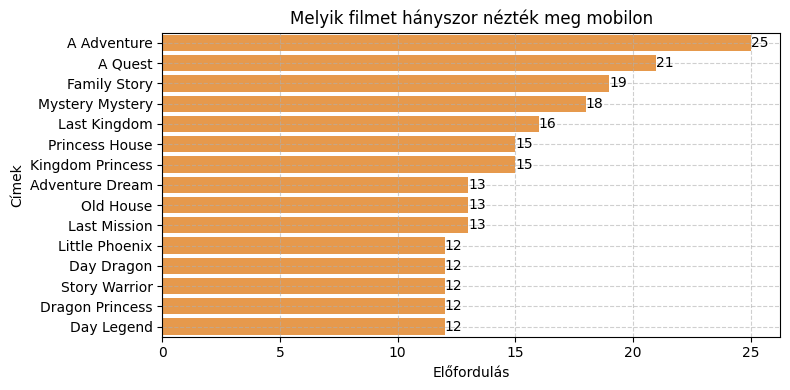

In [31]:
# Nézzük ezt meg vizuálisan
plt.figure(figsize=(8, 4))
ax = (
    sns.barplot(
        data=category_counts.head(15),
        x='count',
        y='cim',
        color='#ff9933'
    )
)
ax.set(xlabel='Előfordulás', ylabel='Címek')
plt.title('Melyik filmet hányszor nézték meg mobilon')
ax.grid(True, linestyle='--', alpha=0.6)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("category_counts2.png", dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# Függvény átlagok számolásához kategóriák szerinti
def agg_avg(df, group_field, calc_field):
    grouped = (
        data.groupby(group_field, dropna=False, observed=True)[calc_field]
        .mean(numeric_only=True)
        .reset_index()
        .sort_values(calc_field, ascending=False)
    )
    return grouped

In [33]:
# Szűrjünk Dokumentum filmekre
mean_documentary = data[data['elsodleges_mufaj'] == 'Documentary']
category_avg_mpg = agg_avg(mean_documentary, 'cim', 'kor')

In [34]:
category_avg_mpg.head(10)

,cim,kor
460,Night Battle,46.000000
552,Queen Legend,45.600000
26,Adventure Queen,45.250000
87,Bright Journey,44.888889
434,Mystery Empire,44.750000
525,Princess Day,44.428571
40,An Mystery,44.333333
72,Big King,43.857143
316,King Princess,43.857143
261,House Family,43.571429


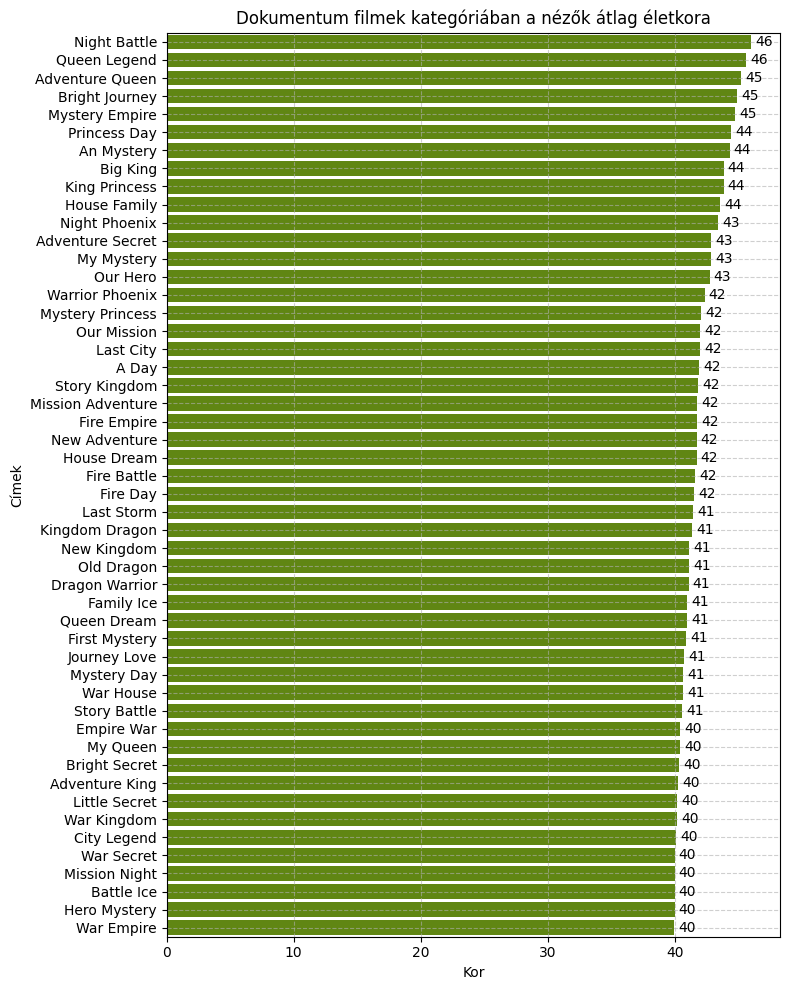

In [35]:
# Nézzük ezt meg vizuálisan
plt.figure(figsize=(8, 10))
ax = (
    sns.barplot(
        data=category_avg_mpg.head(50),
        y='cim',
        x='kor',
        color='#669900'
    )
)
ax.set(xlabel='Kor', ylabel='Címek')
plt.title('Dokumentum filmek kategóriában a nézők átlag életkora')
ax.grid(True, linestyle='--', alpha=0.6)
ax.bar_label(ax.containers[0], fmt="%.0f", label_type="edge", padding=3)
plt.tight_layout()
plt.savefig("category_avg_mpg.png", dpi=300, bbox_inches='tight')
plt.show()

In [36]:
# Függvény pivot táblához
def pivot_count(df, rows, columns, calc_field):
    df_pivot = (
        df.pivot_table(
            values=calc_field,
            index=rows,
            columns=columns,
            aggfunc='size',
            dropna=False
        )
        .dropna(axis=0, how='all')
    )
    return df_pivot

In [37]:
# Értékelések az eszközök és műfajok tekintetében
effic_size_pivot = pivot_count(data, 'elsodleges_mufaj', 'eszkoz_tipus', 'osszes_ertekeles')

In [38]:
effic_size_pivot

eszkoz_tipus,Laptop,Mobile,Smart TV,Tablet
elsodleges_mufaj,,,,
Action,132,135,160,138
Adventure,177,182,185,182
Animation,168,154,171,146
Biography,130,110,152,144
Comedy,148,155,136,159
Crime,128,142,129,138
Documentary,131,124,138,130
Drama,120,112,142,121
Family,123,115,127,125


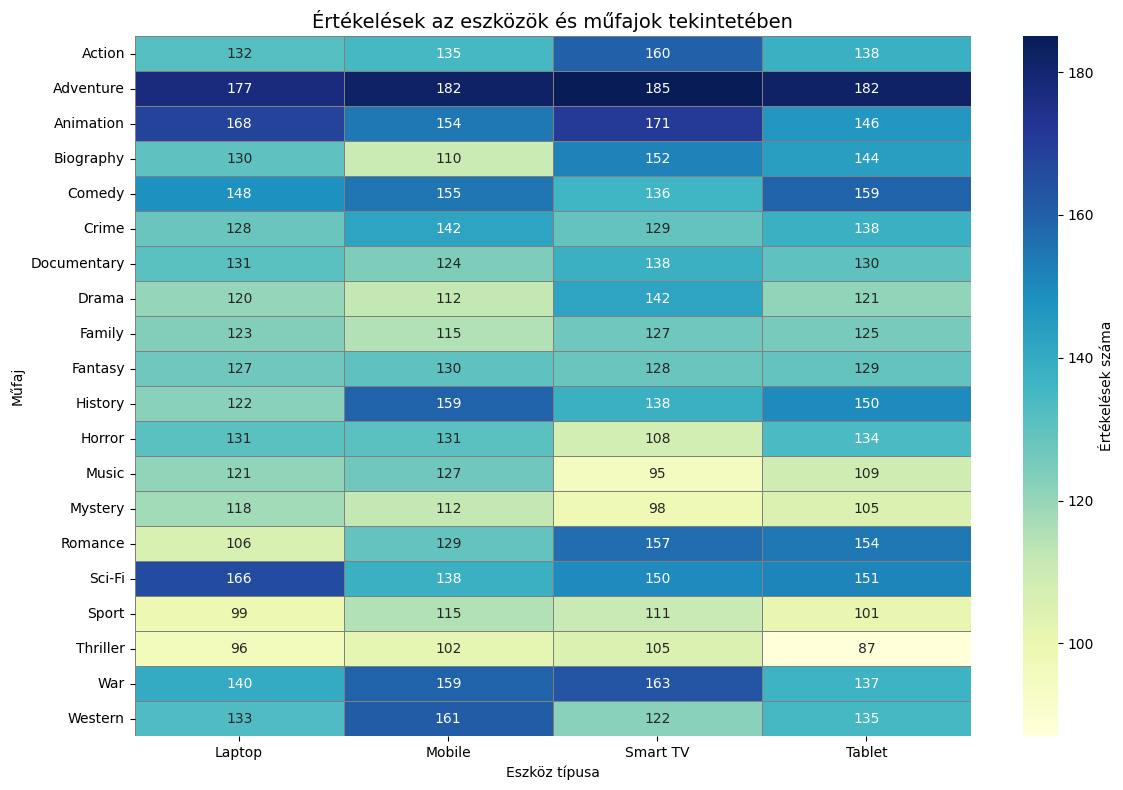

In [39]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    effic_size_pivot,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Értékelések száma'}
)
ax.set_title("Értékelések az eszközök és műfajok tekintetében", fontsize=14)
ax.set_xlabel("Eszköz típusa")
ax.set_ylabel("Műfaj")
plt.tight_layout()
plt.savefig("effic_size_pivot.png", dpi=300, bbox_inches='tight')
plt.show()